#Checkpoint 1 - EDA e Machine Learning
---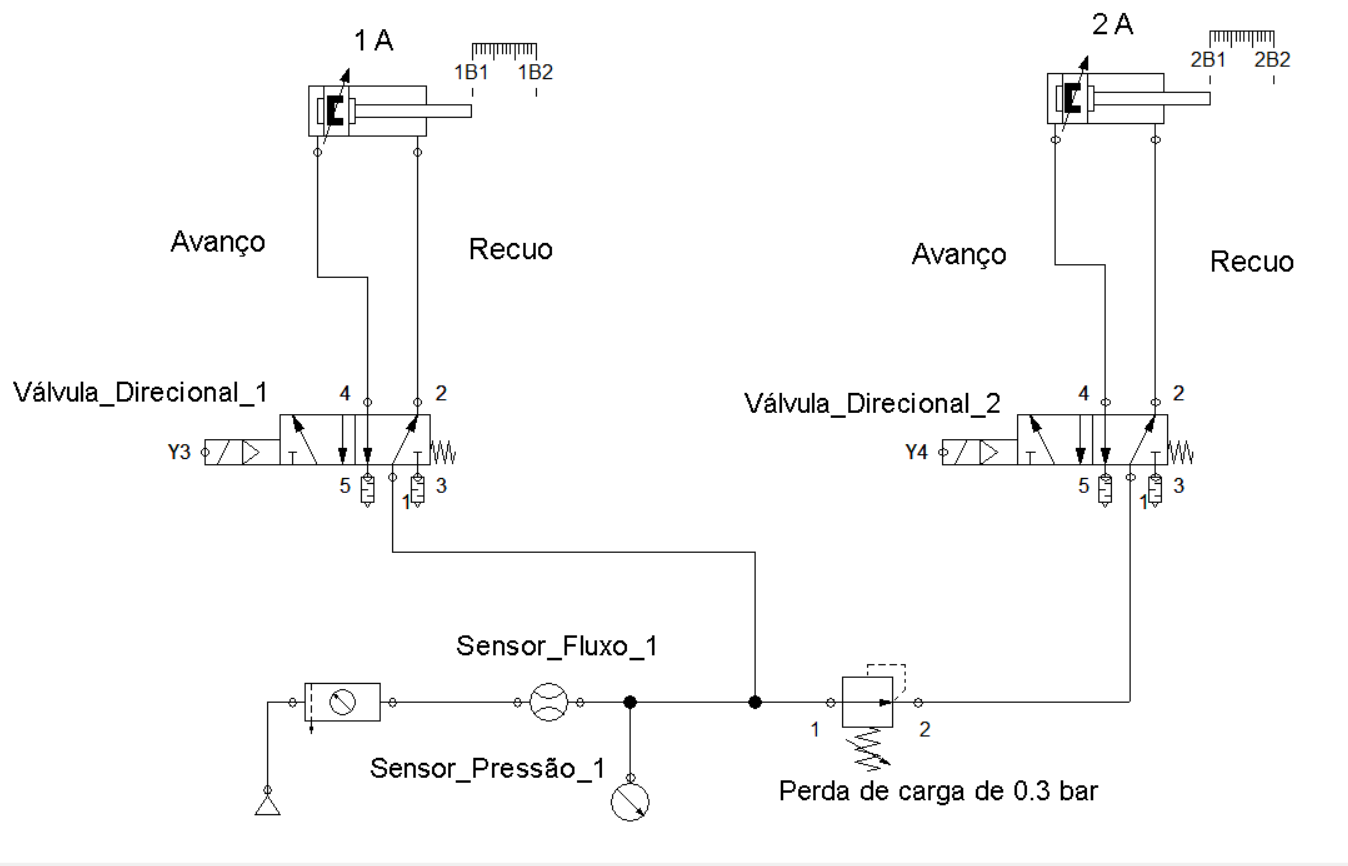

Com base no sistema industrial, foi coletado dados de um sensor de pressão e vazão. Esses dados estão no dataset que estará disponível.

Dado o dataset, as siglas significam:


*   normal: o sistema funciona normalmente;
*   v1a: É o vazamento que foi identificado no avanço da válvula 1 do sistema;
*   v1r: É o vazamento que foi identificado no recuo da válvula 1 do sistema;
*   v2a: É o vazamento que foi identificado no avanço da válvula 2 do sistema;
*   v2r: É o vazamento que foi identificado no recuo da válvula 2 do sistema;
*   v1a: É o vazamento interno que foi identificado no atuador 1 do sistema;
*   v2a: É o vazamento interno que foi identificado no atuador 1 do sistema.

Foram coletadas para todas as classes acima uma variação de 5.4 a 6.6 bar (unidade de pressão).

(3 pts) Fazer uma análise estatística exploratória da base de dados, resumindo as variáveis e o contexto geral da base selecionada. Utilize a biblioteca TSFEL para extrair as características.

(1 pts) Construir 2 gráficos distintos utilizando as variáveis da base. Vocês podem fazer gráficos selecionando parte dos dados de acordo com filtros que julgarem pertinentes. **Atenção**:

1.   Vocês devem variar a seleção de tipos de gráficos e variáveis investigadas. A repetição da mesma variável ou do tipo de gráfico em todas as figuras acarretará desconto de nota;
2.   Todo gráfico deve conter título e legenda. Vocês estão livres para usarem quaisquer configurações a mais que desejarem;
3.	Cada gráfico gerado precisa comunicar uma conclusão relevante/interessante. Caso seu gráfico seja complexo, não deixe de resumi-lo com algumas linhas em comentários *markdown*.

(4 pts) Construir um modelo preditivocom a biblioteca Pycaret. A avaliação partirá dos seguintes critérios:
1. seleção de variável relevante ao Processo como label;
2. seleção apropriada do tipo de modelo com o label selecionado;
3. aplicação de métricas pertinentes ao modelo implementado.
4. implementação correta dos conceitos e passos de *machine learning*;
5. código executado sem erros;
6. conclusões analisando os resultados dos modelos e sua aplicabilidade real.

(1 pts) Construir 1 gráfico do tipo Matriz de Confusão utilizando as variáveis da base. Apresente a performance do modelo com classification report.


In [ ]:
# Coloque o nome dos integrantes e os RMs
# Lucas Thalles dos Santos — RM 558886
# Carolina Estevam Rodgerio — RM 554975
# Enrico Andrade D'Amico — RM 557706

In [1]:
#Construa o código aqui.

!pip install tsfel

In [4]:
import pandas as pd
import tsfel
import numpy as np

In [5]:
data = pd.read_csv('dataset.csv', sep=',') # carregando o arquivo csv usando o , como separador
data

,Flowmeter,Manometer,Diagnostic
0,89.812,NaN,Funcionamento Pleno
1,36.376,5.28830,Funcionamento Pleno
2,34.786,5.29310,Funcionamento Pleno
3,34.786,5.29310,Funcionamento Pleno
4,34.727,5.29320,Funcionamento Pleno
...,...,...,...
71701,#VALOR!,5.96153,Vazamento Interno no A2
71702,#VALOR!,5.96150,Vazamento Interno no A2
71703,#VALOR!,5.96150,Vazamento Interno no A2
71704,#VALOR!,5.96150,Vazamento Interno no A2


In [12]:
# Tarefa 1:
# (3 pts) Fazer uma análise estatística exploratória da base de dados,
# resumindo as variáveis e o contexto geral da base selecionada.
# Utilize a biblioteca TSFEL para extrair as características.

# Exibir primeiras linhas do dataset
print(data.head())

# Estatísticas descritivas
print(data.describe())

# Substituir valores inválidos nas colunas
data['Flowmeter'] = pd.to_numeric(data['Flowmeter'], errors='coerce')
data['Manometer'] = pd.to_numeric(data['Manometer'], errors='coerce')

# Preencher NaNs no início com valor médio da coluna 'Manometer'
if data['Manometer'].isnull().all():
    print("Todos os valores de 'Manometer' são NaN.")
    data['Manometer'] = 5.4  # valor médio que pode ser ajustado
else:
    data['Manometer'].fillna(data['Manometer'].mean(), inplace=True)  # Preenche com a média

# Preencher valores NaN com a média
data['Flowmeter'].fillna(data['Flowmeter'].mean(), inplace=True)

# - Extração de características usando TSFEL
# Configuração do extrator
cfg = tsfel.get_features_by_domain("statistical")

# Extrair características das variáveis Flowmeter e Manometer
flowmeter_features = tsfel.time_series_features_extractor(cfg, data['Flowmeter'])
manometer_features = tsfel.time_series_features_extractor(cfg, data['Manometer'])

# Exibir as características extraídas
print("Características para Flowmeter:\n")
print(flowmeter_features.head())
print("\nCaracterísticas para Manometer:\n")
print(manometer_features.head())

  Flowmeter  Manometer           Diagnostic
0    89.812   5.750964  Funcionamento Pleno
1    36.376   5.288300  Funcionamento Pleno
2    34.786   5.293100  Funcionamento Pleno
3    34.786   5.293100  Funcionamento Pleno
4    34.727   5.293200  Funcionamento Pleno
          Manometer
count  71706.000000
mean       5.750964
std        0.207294
min        5.288300
25%        5.595000
50%        5.795700
75%        5.935800
max        6.000000


Características para Flowmeter:

   0_Absolute energy  0_Average power  0_ECDF Percentile Count_0  \
0       3.105554e+07     43310.141704                    14341.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                    57364.0              14.0958            19.595862   

   0_ECDF_0  0_ECDF_1  0_ECDF_2  0_ECDF_3  ...     0_Mean  \
0  0.000014  0.000028  0.000042  0.000056  ...  19.595862   

   0_Mean absolute deviation   0_Median  0_Median absolute deviation   0_Min  \
0                   3.453924  19.595862                          0.0  10.002   

   0_Peak to peak distance  0_Root mean square  0_Skewness  \
0                    79.81           20.810944     4.58825   

   0_Standard deviation  0_Variance  
0              7.006966   49.097574  

[1 rows x 31 columns]

Características para Manometer:

   0_Absolute energy  0_Average power  0_ECDF Percentile Count_0  \
0       2.374656e+06      3311.702391                    14341.0   

  

In [ ]:
# Tarefa 2:
# Construir 2 gráficos distintos utilizando as variáveis da base.
# Vocês podem fazer gráficos selecionando parte dos dados de acordo
# com filtros que julgarem pertinentes. Atenção:
# Vocês devem variar a seleção de tipos de gráficos e variáveis investigadas.
# A repetição da mesma variável ou do tipo de gráfico em todas as figuras acarretará desconto de nota;
# Todo gráfico deve conter título e legenda. Vocês estão livres para usarem quaisquer configurações a mais que desejarem;
# Cada gráfico gerado precisa comunicar uma conclusão relevante/interessante. Caso seu gráfico seja complexo,
# não deixe de resumi-lo com algumas linhas em comentários markdown.

# Gráfico 1: Scatter Plot

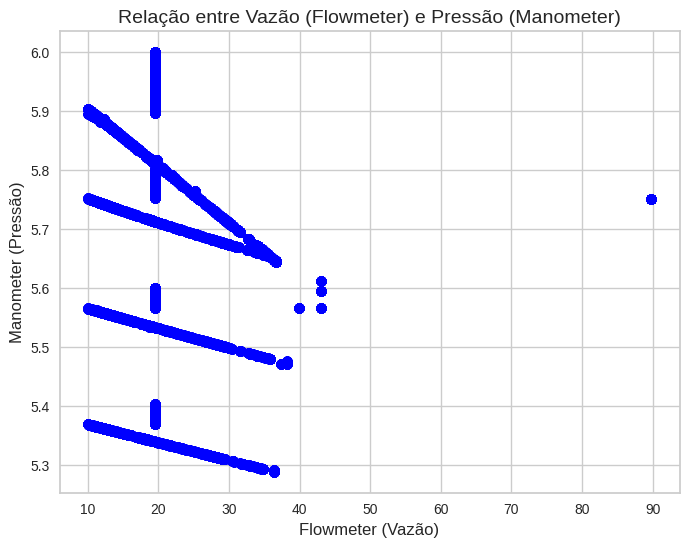

In [13]:
import matplotlib.pyplot as plt

# Dados filtrados (sem NaN e valores inválidos)
filtered_data = data.dropna()

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Flowmeter'], filtered_data['Manometer'], color='blue')

# Título e legendas
plt.title('Relação entre Vazão (Flowmeter) e Pressão (Manometer)', fontsize=14)
plt.xlabel('Flowmeter (Vazão)', fontsize=12)
plt.ylabel('Manometer (Pressão)', fontsize=12)

# Exibir gráfico
plt.grid(True)
plt.show()


# Gráfico 2: Bar Plot

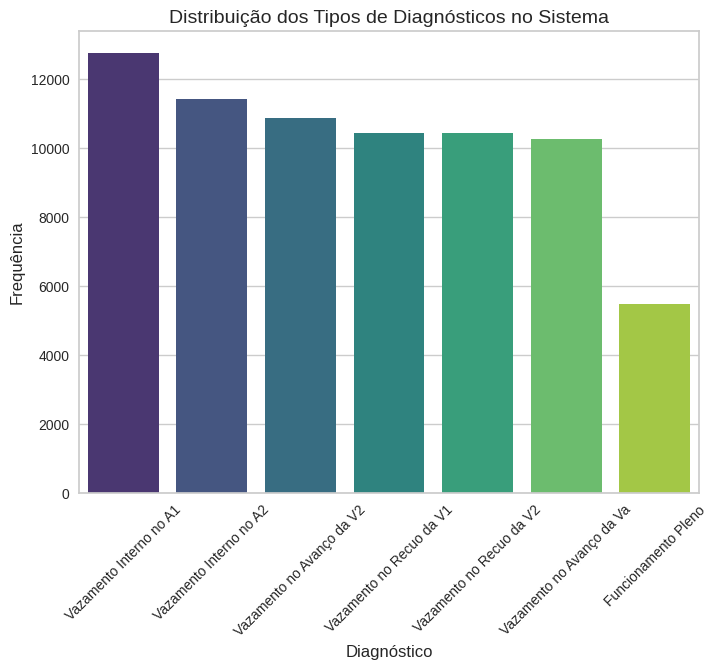

In [14]:
import seaborn as sns

# Contar as ocorrências de cada tipo de diagnóstico
diagnostic_counts = data['Diagnostic'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnostic_counts.index, y=diagnostic_counts.values, palette='viridis')

# Título e legendas
plt.title('Distribuição dos Tipos de Diagnósticos no Sistema', fontsize=14)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir gráfico
plt.xticks(rotation=45)
plt.show()


In [2]:
# Tarefa 3:
# (4 pts) Construir um modelo preditivocom a biblioteca Pycaret.
# A avaliação partirá dos seguintes critérios:
#
# seleção de variável relevante ao Processo como label;
# seleção apropriada do tipo de modelo com o label selecionado;
# aplicação de métricas pertinentes ao modelo implementado.
# implementação correta dos conceitos e passos de machine learning;
# código executado sem erros;
# conclusões analisando os resultados dos modelos e sua aplicabilidade real.

!pip install pycaret

In [18]:
from pycaret.classification import *

# Preparar os dados
# Selecionamos 'Diagnostic' como a variável alvo
clf = setup(data, target='Diagnostic', session_id=123, verbose=False)

# Comparar os principais modelos de classificação
best_model = compare_models()

# Exibir o modelo com o melhor desempenho
print(best_model)

# Treinar o melhor modelo
trained_model = create_model(best_model)

# Avaliar o modelo com métricas pertinentes
evaluate_model(trained_model)

# Fazer previsões
predictions = predict_model(trained_model)

# Exibir previsões
print(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8793,0.9894,0.8793,0.8800,0.8779,0.8582,0.8588,8.1300
et,Extra Trees Classifier,0.8790,0.9899,0.8790,0.8795,0.8774,0.8578,0.8584,2.8430
dt,Decision Tree Classifier,0.8789,0.9897,0.8789,0.8794,0.8774,0.8577,0.8583,0.3140
knn,K Neighbors Classifier,0.8085,0.9670,0.8085,0.8072,0.8067,0.7750,0.7754,0.5840
lightgbm,Light Gradient Boosting Machine,0.5323,0.8877,0.5323,0.5217,0.5170,0.4479,0.4512,14.0430
gbc,Gradient Boosting Classifier,0.5223,0.0000,0.5223,0.5289,0.5037,0.4361,0.4426,19.7680
xgboost,Extreme Gradient Boosting,0.4987,0.8647,0.4987,0.4843,0.4825,0.4080,0.4109,2.8950
ada,Ada Boost Classifier,0.3677,0.0000,0.3677,0.3887,0.3395,0.2565,0.2637,1.5910
lr,Logistic Regression,0.1832,0.0000,0.1832,0.0879,0.0949,0.0128,0.0203,3.0690
lda,Linear Discriminant Analysis,0.1830,0.0000,0.1830,0.0878,0.0971,0.0129,0.0198,0.2360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8753,0.9889,0.8753,0.8758,0.8734,0.8534,0.8542
1,0.8737,0.9889,0.8737,0.8750,0.8719,0.8515,0.8524
2,0.8841,0.9900,0.8841,0.8861,0.8832,0.8637,0.8644
3,0.8799,0.9893,0.8799,0.8805,0.8785,0.8588,0.8594
4,0.8797,0.9894,0.8797,0.8810,0.8785,0.8586,0.8592
5,0.8826,0.9889,0.8826,0.8820,0.8812,0.8621,0.8625
6,0.8830,0.9898,0.8830,0.8833,0.8815,0.8625,0.8631
7,0.8775,0.9897,0.8775,0.8775,0.8762,0.8560,0.8565
8,0.8799,0.9891,0.8799,0.8812,0.8785,0.8588,0.8595


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8808,0.9905,0.8808,0.8822,0.8794,0.8598,0.8606


       Flowmeter  Manometer                 Diagnostic  \
62452  25.502001    5.32110   Vazamento no Recuo da V2   
69754  19.595861    5.95969    Vazamento Interno no A1   
37136  24.404600    5.51664   Vazamento no Recuo da V1   
60968  19.595861    5.39750   Vazamento no Recuo da V1   
25868  36.696999    5.64480   Vazamento no Recuo da V1   
...          ...        ...                        ...   
50453  19.595861    5.99198   Vazamento no Recuo da V1   
38398  19.595861    5.98990   Vazamento no Recuo da V1   
65070  19.595861    5.99745  Vazamento no Avanço da Va   
25624  19.595861    5.79560   Vazamento no Recuo da V1   
18012  19.595861    5.99989  Vazamento no Avanço da Va   

                prediction_label  prediction_score  
62452   Vazamento no Recuo da V2            0.9900  
69754    Vazamento Interno no A1            1.0000  
37136   Vazamento no Recuo da V1            0.8400  
60968   Vazamento no Recuo da V1            1.0000  
25868  Vazamento no Avanço da V2      

## No teste executado antes de enviar o checkpoint, o modelo com melhor performance foi o Random Forest Classifier.

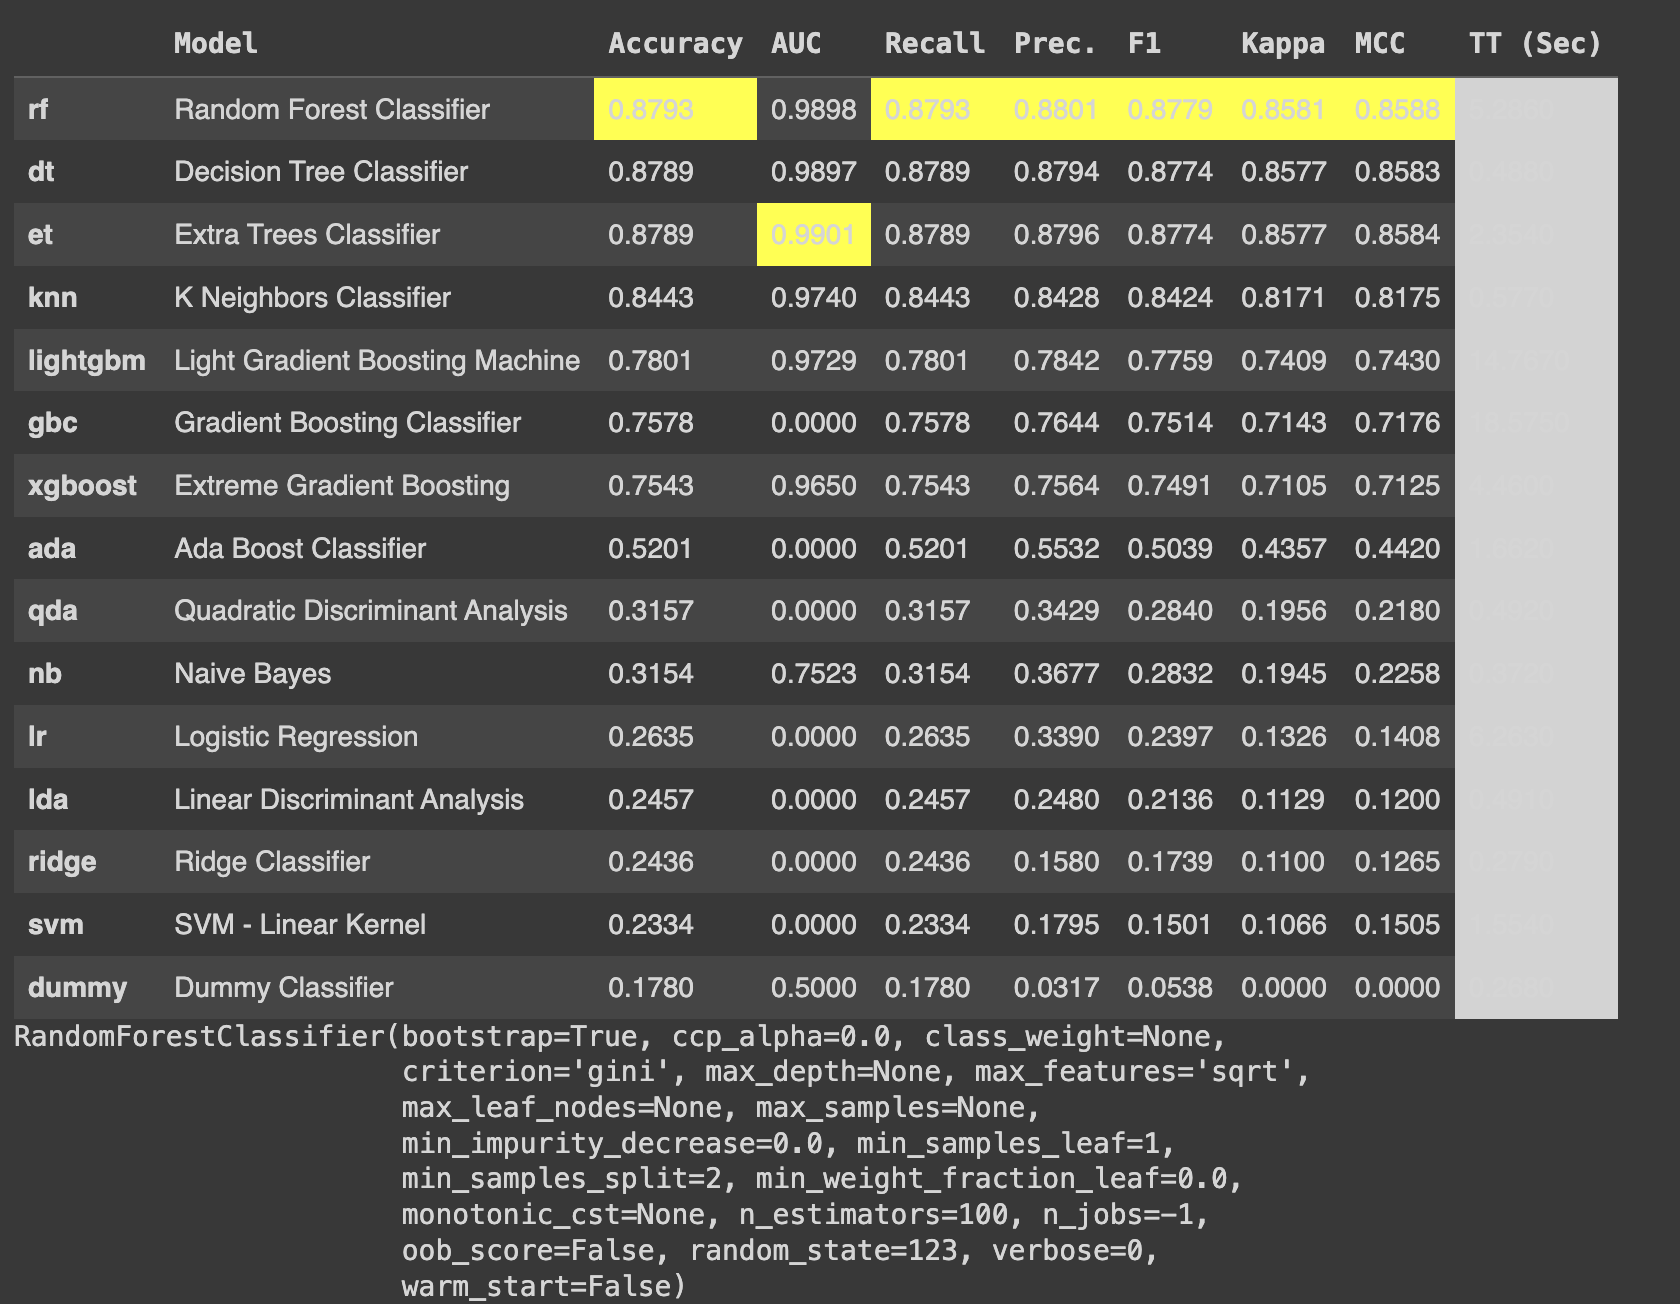

## E esse foi o resultado das previsões:

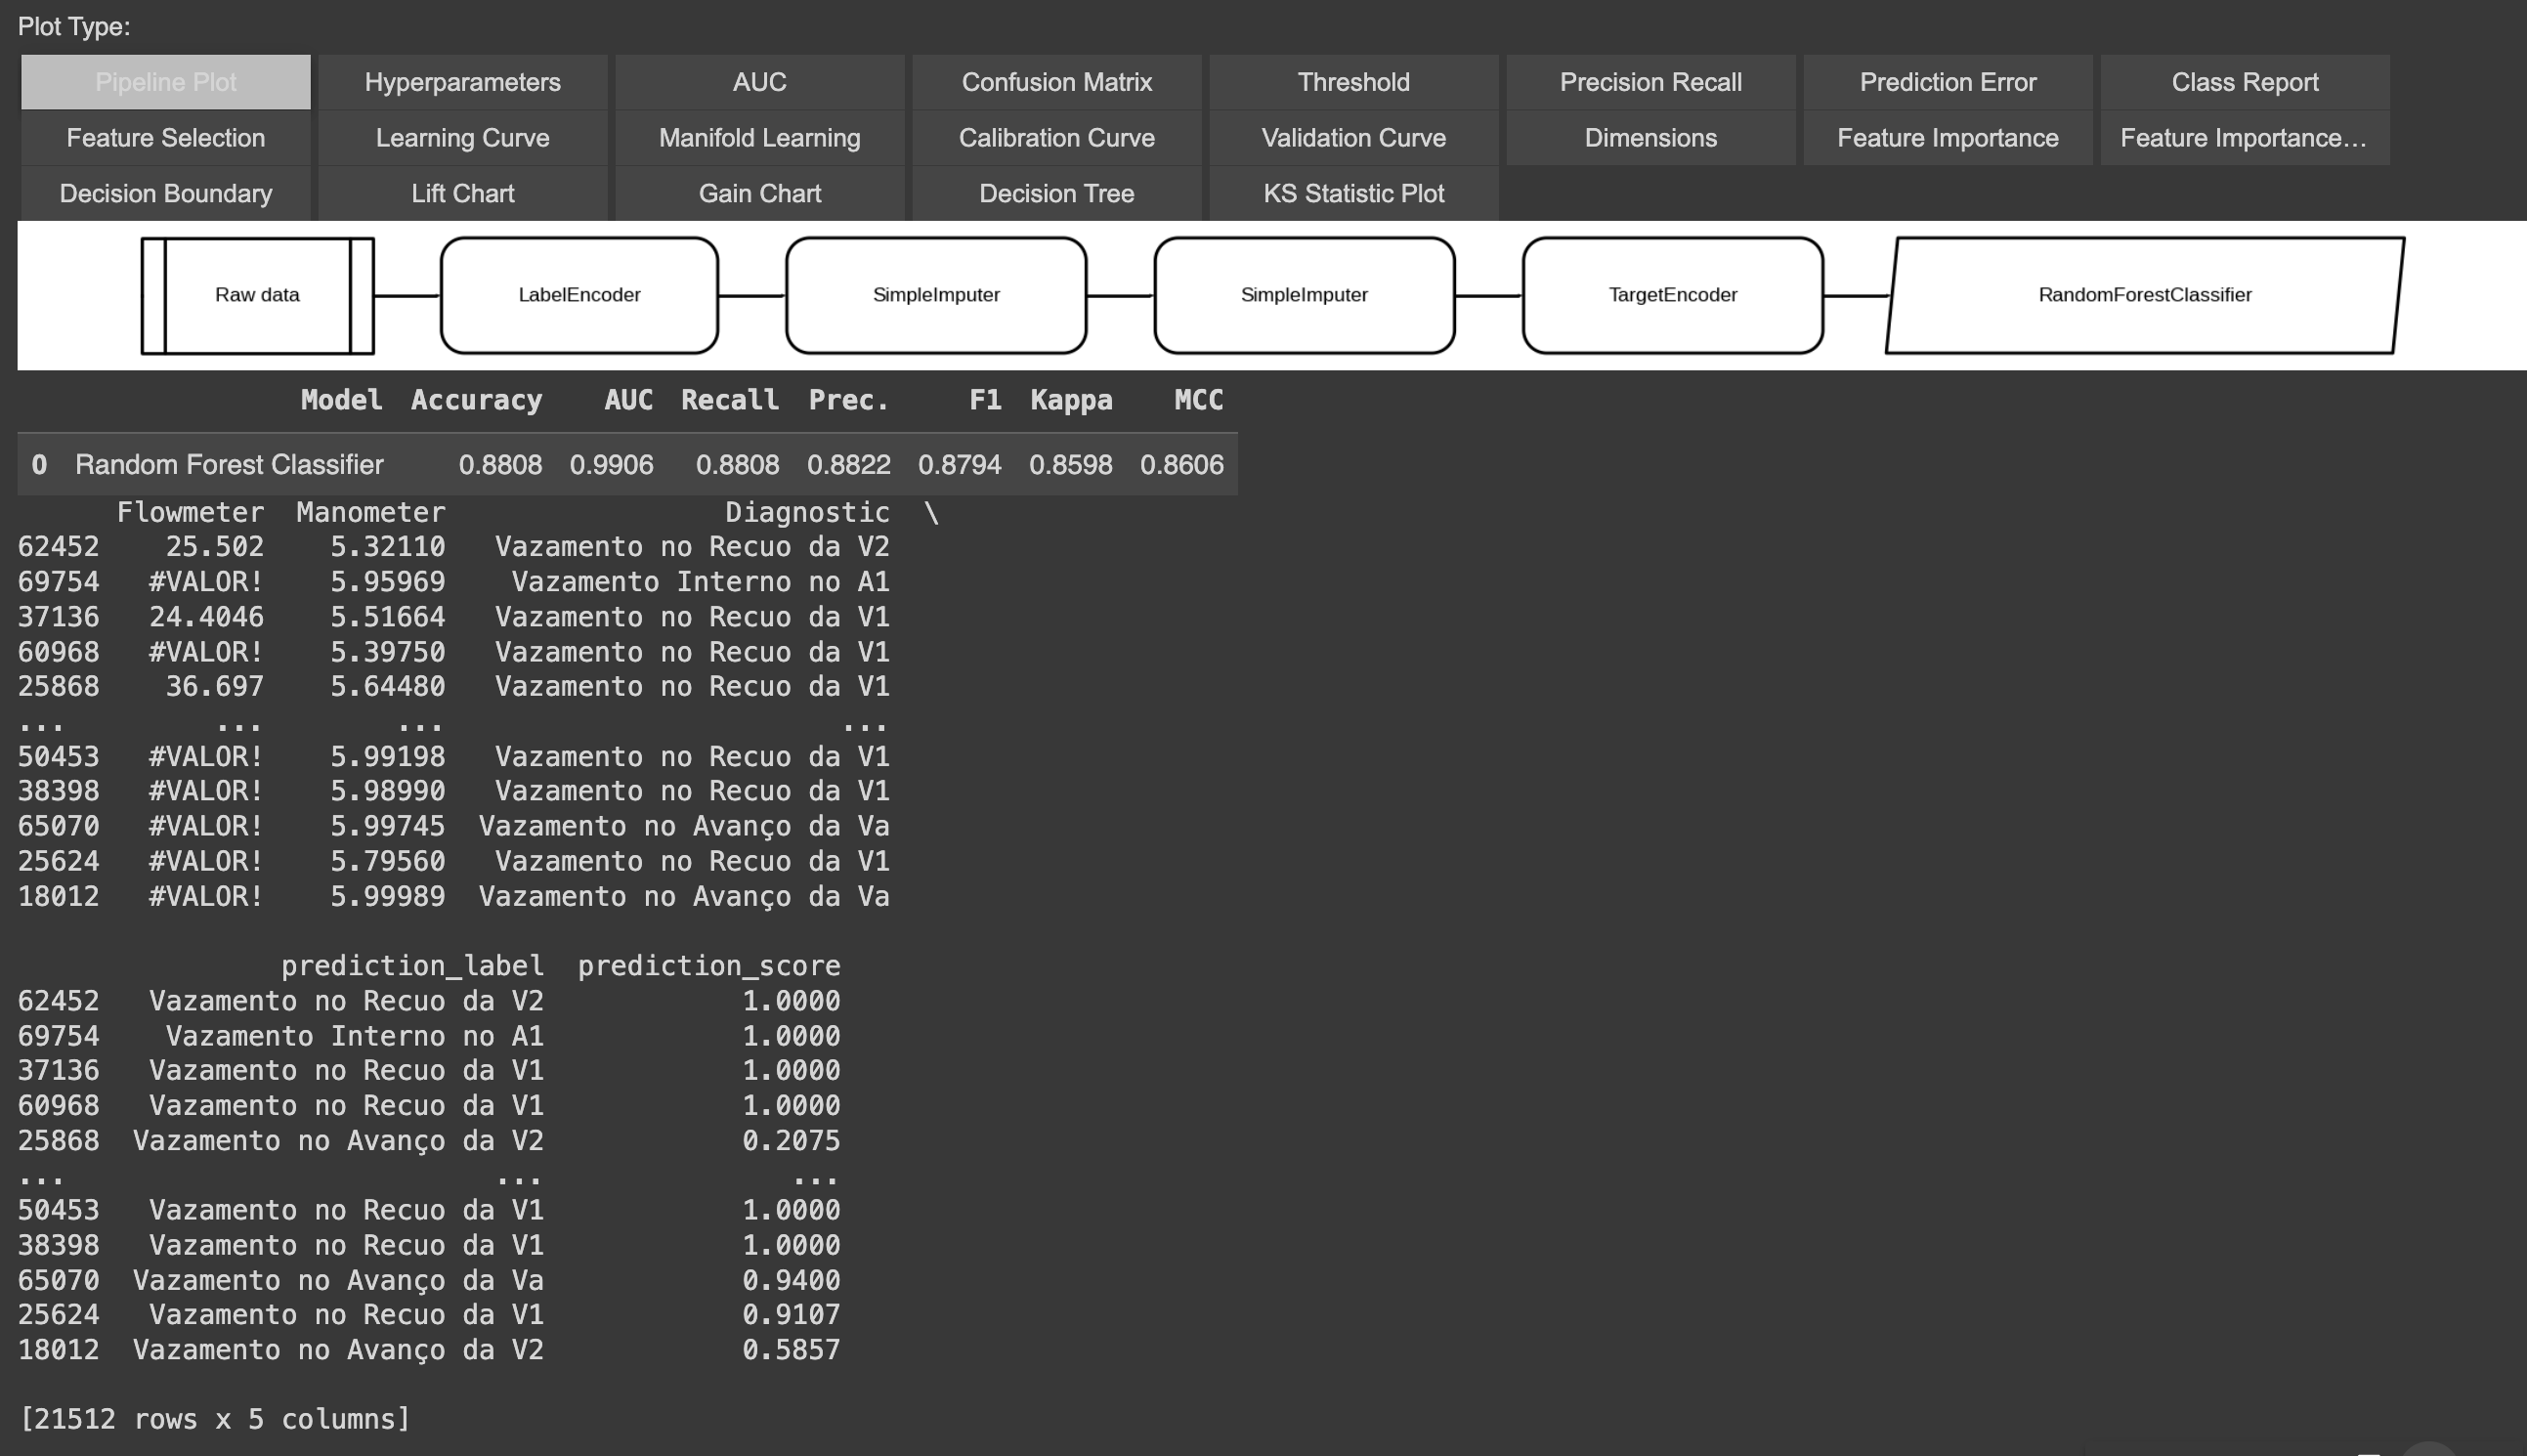

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8808,0.9905,0.8808,0.8822,0.8794,0.8598,0.8606


       Flowmeter  Manometer                Diagnostic  \
62452  25.502001    5.32110  Vazamento no Recuo da V2   
69754  19.595861    5.95969   Vazamento Interno no A1   
37136  24.404600    5.51664  Vazamento no Recuo da V1   
60968  19.595861    5.39750  Vazamento no Recuo da V1   
25868  36.696999    5.64480  Vazamento no Recuo da V1   

                prediction_label  prediction_score  
62452   Vazamento no Recuo da V2            0.9900  
69754    Vazamento Interno no A1            1.0000  
37136   Vazamento no Recuo da V1            0.8400  
60968   Vazamento no Recuo da V1            1.0000  
25868  Vazamento no Avanço da V2            0.2075  


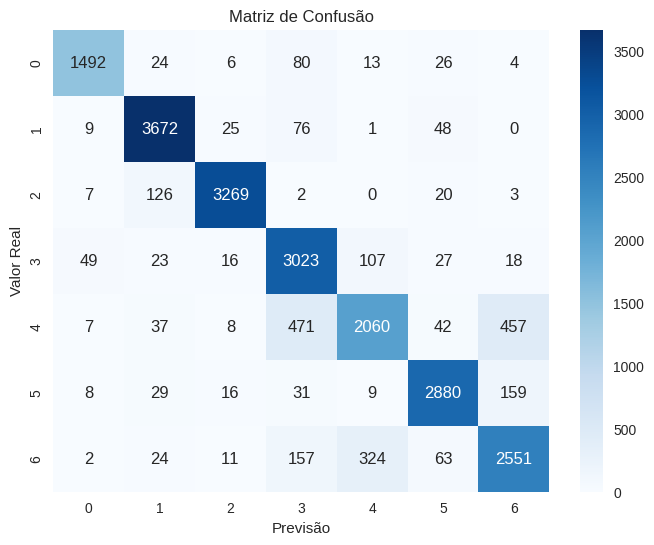

Classification Report:

                           precision    recall  f1-score   support

      Funcionamento Pleno       0.95      0.91      0.93      1645
  Vazamento Interno no A1       0.93      0.96      0.95      3831
  Vazamento Interno no A2       0.98      0.95      0.96      3427
Vazamento no Avanço da V2       0.79      0.93      0.85      3263
Vazamento no Avanço da Va       0.82      0.67      0.74      3082
 Vazamento no Recuo da V1       0.93      0.92      0.92      3132
 Vazamento no Recuo da V2       0.80      0.81      0.81      3132

                 accuracy                           0.88     21512
                macro avg       0.88      0.88      0.88     21512
             weighted avg       0.88      0.88      0.88     21512



In [19]:
# Tarefa 4:
# Construir 1 gráfico do tipo Matriz de Confusão utilizando as variáveis da base.
# Apresente a performance do modelo com classification report.
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Fazer previsões usando o modelo treinado
predictions = predict_model(trained_model)

# Exibir as primeiras linhas das previsões
print(predictions.head())

# Obter os valores reais e as previsões
y_true = predictions['Diagnostic']  # Valor real
y_pred = predictions['prediction_label']  # Previsão do modelo

# 1. Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=trained_model.classes_, yticklabels=trained_model.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()

# 2. Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:\n")
print(report)
